# GloVe : getting relevant word embeddings

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import random
sns.set()

In [2]:
#nltk imports
import nltk
from nltk.corpus import stopwords
#uncomment the below line and download the stopwords corpora from nltk if possible

## 1. Setup

In [3]:
def get_tokens(raw,encoding='utf8'):
    '''get the nltk tokens from a text'''
    tokens = nltk.word_tokenize(raw) #tokenize the raw UTF-8 text
    return tokens
def get_stopswords(type="other"):
    '''returns the veronis stopwords in unicode, or if any other value is passed, it returns the default nltk french stopwords'''
    if type=="veronis":
        #VERONIS STOPWORDS
        raw_stopword_list = ["Ap.", "Apr.", "GHz", "MHz", "USD", "a", "afin", "ah", "ai", "aie", "aient", "aies", "ait", "alors", "après", "as", "attendu", "au", "au-delà", "au-devant", "aucun", "aucune", "audit", "auprès", "auquel", "aura", "aurai", "auraient", "aurais", "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", "aussi", "autour", "autre", "autres", "autrui", "aux", "auxdites", "auxdits", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", "avec", "avez", "aviez", "avions", "avons", "ayant", "ayez", "ayons", "b", "bah", "banco", "ben", "bien", "bé", "c", "c'", "c'est", "c'était", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là", "celles", "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "celà", "cent", "cents", "cependant", "certain", "certaine", "certaines", "certains", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "cf.", "cg", "cgr", "chacun", "chacune", "chaque", "chez", "ci", "cinq", "cinquante", "cinquante-cinq", "cinquante-deux", "cinquante-et-un", "cinquante-huit", "cinquante-neuf", "cinquante-quatre", "cinquante-sept", "cinquante-six", "cinquante-trois", "cl", "cm", "cm²", "comme", "contre", "d", "d'", "d'après", "d'un", "d'une", "dans", "de", "depuis", "derrière", "des", "desdites", "desdits", "desquelles", "desquels", "deux", "devant", "devers", "dg", "différentes", "différents", "divers", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", "dl", "dm", "donc", "dont", "douze", "du", "dudit", "duquel", "durant", "dès", "déjà", "e", "eh", "elle", "elles", "en", "en-dehors", "encore", "enfin", "entre", "envers", "es", "est", "et", "eu", "eue", "eues", "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "eûmes", "eût", "eûtes", "f", "fait", "fi", "flac", "fors", "furent", "fus", "fusse", "fussent", "fusses", "fussiez", "fussions", "fut", "fûmes", "fût", "fûtes", "g", "gr", "h", "ha", "han", "hein", "hem", "heu", "hg", "hl", "hm", "hm³", "holà", "hop", "hormis", "hors", "huit", "hum", "hé", "i", "ici", "il", "ils", "j", "j'", "j'ai", "j'avais", "j'étais", "jamais", "je", "jusqu'", "jusqu'au", "jusqu'aux", "jusqu'à", "jusque", "k", "kg", "km", "km²", "l", "l'", "l'autre", "l'on", "l'un", "l'une", "la", "laquelle", "le", "lequel", "les", "lesquelles", "lesquels", "leur", "leurs", "lez", "lors", "lorsqu'", "lorsque", "lui", "lès", "m", "m'", "ma", "maint", "mainte", "maintes", "maints", "mais", "malgré", "me", "mes", "mg", "mgr", "mil", "mille", "milliards", "millions", "ml", "mm", "mm²", "moi", "moins", "mon", "moyennant", "mt", "m²", "m³", "même", "mêmes", "n", "n'avait", "n'y", "ne", "neuf", "ni", "non", "nonante", "nonobstant", "nos", "notre", "nous", "nul", "nulle", "nº", "néanmoins", "o", "octante", "oh", "on", "ont", "onze", "or", "ou", "outre", "où", "p", "par", "par-delà", "parbleu", "parce", "parmi", "pas", "passé", "pendant", "personne", "peu", "plus", "plus_d'un", "plus_d'une", "plusieurs", "pour", "pourquoi", "pourtant", "pourvu", "près", "puisqu'", "puisque", "q", "qu", "qu'", "qu'elle", "qu'elles", "qu'il", "qu'ils", "qu'on", "quand", "quant", "quarante", "quarante-cinq", "quarante-deux", "quarante-et-un", "quarante-huit", "quarante-neuf", "quarante-quatre", "quarante-sept", "quarante-six", "quarante-trois", "quatorze", "quatre", "quatre-vingt", "quatre-vingt-cinq", "quatre-vingt-deux", "quatre-vingt-dix", "quatre-vingt-dix-huit", "quatre-vingt-dix-neuf", "quatre-vingt-dix-sept", "quatre-vingt-douze", "quatre-vingt-huit", "quatre-vingt-neuf", "quatre-vingt-onze", "quatre-vingt-quatorze", "quatre-vingt-quatre", "quatre-vingt-quinze", "quatre-vingt-seize", "quatre-vingt-sept", "quatre-vingt-six", "quatre-vingt-treize", "quatre-vingt-trois", "quatre-vingt-un", "quatre-vingt-une", "quatre-vingts", "que", "quel", "quelle", "quelles", "quelqu'", "quelqu'un", "quelqu'une", "quelque", "quelques", "quelques-unes", "quelques-uns", "quels", "qui", "quiconque", "quinze", "quoi", "quoiqu'", "quoique", "r", "revoici", "revoilà", "rien", "s", "s'", "sa", "sans", "sauf", "se", "seize", "selon", "sept", "septante", "sera", "serai", "seraient", "serais", "serait", "seras", "serez", "seriez", "serions", "serons", "seront", "ses", "si", "sinon", "six", "soi", "soient", "sois", "soit", "soixante", "soixante-cinq", "soixante-deux", "soixante-dix", "soixante-dix-huit", "soixante-dix-neuf", "soixante-dix-sept", "soixante-douze", "soixante-et-onze", "soixante-et-un", "soixante-et-une", "soixante-huit", "soixante-neuf", "soixante-quatorze", "soixante-quatre", "soixante-quinze", "soixante-seize", "soixante-sept", "soixante-six", "soixante-treize", "soixante-trois", "sommes", "son", "sont", "sous", "soyez", "soyons", "suis", "suite", "sur", "sus", "t", "t'", "ta", "tacatac", "tandis", "te", "tel", "telle", "telles", "tels", "tes", "toi", "ton", "toujours", "tous", "tout", "toute", "toutefois", "toutes", "treize", "trente", "trente-cinq", "trente-deux", "trente-et-un", "trente-huit", "trente-neuf", "trente-quatre", "trente-sept", "trente-six", "trente-trois", "trois", "très", "tu", "u", "un", "une", "unes", "uns", "v", "vers", "via", "vingt", "vingt-cinq", "vingt-deux", "vingt-huit", "vingt-neuf", "vingt-quatre", "vingt-sept", "vingt-six", "vingt-trois", "vis-à-vis", "voici", "voilà", "vos", "votre", "vous", "w", "x", "y", "z", "zéro", "à", "ç'", "ça", "ès", "étaient", "étais", "était", "étant", "étiez", "étions", "été", "étée", "étées", "étés", "êtes", "être", "ô"]
    else:
        #get French stopwords from the nltk kit
        raw_stopword_list = stopwords.words('french') #create a list of all French stopwords
    stopword_list = [word for word in raw_stopword_list] #make to decode the French stopwords as unicode objects rather than ascii
    return stopword_list
def filter_stopwords(text,stopword_list):
    '''normalizes the words by turning them all lowercase and then filters out the stopwords'''
    words=[w.lower() for w in text] #normalize the words in the text, making them all lowercase
    #filtering stopwords
    filtered_words = [] #declare an empty list to hold our filtered words
    for word in words: #iterate over all words from the text
        if word not in stopword_list and word.isalpha() and len(word) > 1: #only add words that are not in the French stopwords list, are alphabetic, and are more than 1 character
            filtered_words.append(word) #add word to filter_words list if it meets the above conditions
    filtered_words.sort() #sort filtered_words list
    return filtered_words

In [4]:
data = pd.read_csv('all_items_improved.csv', sep=',')

In [5]:
data = data[data.item_price > 0]
data = data[data.item_price < 200]
data['rest_location'] = data['rest_location'].apply(lambda x: x.split("\n")[1].strip())
data['rest_location'] = data['rest_location'].replace('', '0').replace('Bercy Village', '0').astype(int)

data.index = np.arange(len(data.item))

For speed, we're only using the 250 most common words.

In [6]:
context_window = 4
top_k = 5000

def tokenize(string):
    tokens = get_tokens(string)
    stop_words = get_stopswords()
    filtered_tokens = filter_stopwords(tokens,stop_words)
    return filtered_tokens

word_counter = collections.Counter()
for example in data.item:
    word_counter.update(tokenize(example))
    
vocabulary = [pair[0] for pair in word_counter.most_common(top_k)]
idx_to_word = dict(enumerate(vocabulary))
word_to_idx = dict(zip(idx_to_word.values(), idx_to_word.keys()))

### Extract coorcurrences

In [7]:
def extract_cooccurrences(dataset, word_map, amount_of_context=context_window):
    num_words = len(vocabulary)
    cooccurrences = np.zeros((num_words, num_words))
    nonzero_pairs = set()
    for example in dataset:
        words = tokenize(example)
        for target_index in range(len(words)):
            target_word = words[target_index]
            if target_word not in word_to_idx:
                continue
            target_word_index = word_to_idx[target_word]
            min_context_index = max(0, target_index - amount_of_context)
            max_word = min(len(words), target_index + amount_of_context + 1)
            for context_index in list(range(min_context_index, target_index)) + \
            list(range(target_index + 1, max_word)):
                context_word = words[context_index]
                if context_word not in word_to_idx:
                    continue
                context_word_index = word_to_idx[context_word]
                cooccurrences[target_word_index][context_word_index] += 1.0
                nonzero_pairs.add((target_word_index, context_word_index))
    return cooccurrences, list(nonzero_pairs)
                
cooccurrences, nonzero_pairs = extract_cooccurrences(data.item, vocabulary)

### Batchify data

In [8]:
# We will train on batches of (count, word_i, word_j) combinations.

def batch_iter(nonzero_pairs, cooccurrences, batch_size):
    start = -1 * batch_size
    dataset_size = len(nonzero_pairs)
    order = list(range(dataset_size))
    random.shuffle(order)

    while True:
        start += batch_size
        word_i = []
        word_j = []
        counts = []
        if start > dataset_size - batch_size:
            # Start another epoch.
            start = 0
            random.shuffle(order)
        batch_indices = order[start:start + batch_size]
        batch = [nonzero_pairs[index] for index in batch_indices]
        for k in batch:
            counts.append(cooccurrences[k])
            word_i.append(k[0])
            word_j.append(k[1])
        yield [counts, word_i, word_j]
        

To be frank, a GloVe model trained on such a small dataset and vocabulary won't be spectacular, so we won't bother with a full-fledged similarity or analogy evaluation. Instead, we'll use the simple scoring function below, which grades the model on how well it captures ten easy/simple similarity comparisons. The function returns a score between 0 and 10. Random embeddings can be expected to get a score of 5.

## 2. Modeling

### Metric

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

def similarity(model, word_one, word_two):
    vec_one = model.get_embeddings(word_to_idx[word_one]).reshape(1, -1)
    vec_two = model.get_embeddings(word_to_idx[word_two]).reshape(1, -1)
    return float(cosine_similarity(vec_one, vec_two))

def score(model):
    m = model
    score = 0
    score += similarity(m, 'cabillaud', 'poisson') > similarity(m, 'cabillaud', 'magret')
    #score += similarity(m, 'de', 'au') > similarity(m, 'de', 'ou')
    score += similarity(m, 'poulet', 'boeuf') >  similarity(m, 'poulet', 'légumes')
    score += similarity(m, 'pomme', 'fruits') > similarity(m, 'pomme', 'fromage')
    score += similarity(m, 'chocolat', 'vanille') > similarity(m, 'chocolat', 'crème')
    score += similarity(m, 'mozzarella', 'fromage') > similarity(m, 'mozzarella', 'miel')
    score += similarity(m, 'café', 'thé') > similarity(m, 'café', 'huile')
    score += similarity(m, 'entrecôte', 'viande') > similarity(m, 'entrecôte', 'poisson')
    score += similarity(m, 'vin', 'champagne') > similarity(m, 'vin', 'soupe')
    score += similarity(m, 'confiture', 'nutella') > similarity(m, 'confiture', 'beignets')
    return score

### Model

In [10]:
training_set = data.item

In [11]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

class Glove(nn.Module):
    def __init__(self, embedding_dim, vocab_size, batch_size):
        super(Glove, self).__init__()
        self.word_embeddings = None
        
        self.word_embeds = nn.Embedding(vocab_size, embedding_dim)
        self.co_word_embeds = nn.Embedding(vocab_size, embedding_dim)
        
        self.bias_1 = Variable(torch.FloatTensor(batch_size))
        self.bias_2 = Variable(torch.FloatTensor(batch_size))

    
    def forward(self, counts, words, co_words, xmax, alpha):
        
        embedded_words = self.word_embeds(words)
        embedded_co_words = self.co_word_embeds(co_words)

        embed_prod = torch.sum(embedded_words * embedded_co_words, dim=1)
        weights = torch.FloatTensor([pow(count/xmax, alpha) if count <= xmax else 1 for count in counts])
        
        counts = Variable(torch.FloatTensor(counts))
        squared_error = torch.pow(embed_prod + self.bias_1 + self.bias_2 - torch.log(counts), 2)
        cost = torch.dot(Variable(weights), squared_error)
        
        return cost
        
        
    def init_weights(self, i_range):
        self.word_embeds.weight.data.uniform_(-i_range, i_range)
        self.co_word_embeds.weight.data.uniform_(-i_range, i_range)
        
        nn.init.uniform(self.bias_1, -i_range/2, i_range/2)
        nn.init.uniform(self.bias_2, -i_range/2, i_range/2)
    
    def add_embeddings(self):

        self.word_embeddings = (self.word_embeds.weight + self.co_word_embeds.weight).data.numpy()
        return self.word_embeddings
    
    def get_embeddings(self, index):
        if self.word_embeddings is None:
            add_embeddings()
        return self.word_embeddings[index, :]

### Training Loop

In [12]:
def training_loop(batch_size, num_epochs, model, optim, data_iter, xmax, alpha):
    step = 0
    epoch = 0
    losses = []
    total_batches = int(len(training_set) / batch_size)
    while epoch <= num_epochs:
        model.train()
        counts, words, co_words = next(data_iter)        
        words_var = Variable(torch.LongTensor(words))
        co_words_var = Variable(torch.LongTensor(co_words))
        
        model.zero_grad()

        loss = model(counts, words_var, co_words_var, xmax, alpha)

        losses.append(loss.data[0])
        loss.backward()
        optimizer.step()
        
        if step % total_batches == 0:
            epoch += 1
            if epoch % 25 == 0:
                word_embeddings = model.add_embeddings()
                print( "Epoch:", (epoch), "Avg Loss:", np.mean(losses)/(total_batches*epoch), "Score:", score(model) )
        
        step += 1

## 3. Testing

In [15]:
embedding_dim = 50
vocab_size = len(vocabulary)
batch_size = 1024
learning_rate = 1.
num_epochs = 1500
alpha = 0.75
xmax = 50

glove = Glove(embedding_dim, vocab_size, batch_size)
glove.init_weights(0.1)
optimizer = torch.optim.Adadelta(glove.parameters(), lr=learning_rate)
data_iter = batch_iter(nonzero_pairs, cooccurrences, batch_size)

training_loop(batch_size, num_epochs, glove, optimizer, data_iter, xmax, alpha)

Epoch: 25 Avg Loss: 0.0746728771171 Score: 6
Epoch: 50 Avg Loss: 0.0269531779422 Score: 5
Epoch: 75 Avg Loss: 0.0145810360045 Score: 7
Epoch: 100 Avg Loss: 0.00929191700353 Score: 6
Epoch: 125 Avg Loss: 0.00651789409186 Score: 7
Epoch: 150 Avg Loss: 0.0048649967293 Score: 7
Epoch: 175 Avg Loss: 0.00379553458865 Score: 7
Epoch: 200 Avg Loss: 0.00306057749089 Score: 7
Epoch: 225 Avg Loss: 0.00253167561746 Score: 7
Epoch: 250 Avg Loss: 0.00213670267515 Score: 7
Epoch: 275 Avg Loss: 0.00183391596485 Score: 6
Epoch: 300 Avg Loss: 0.00159593789144 Score: 6
Epoch: 325 Avg Loss: 0.00140444361005 Score: 7
Epoch: 350 Avg Loss: 0.00124830738055 Score: 6
Epoch: 375 Avg Loss: 0.00111939565642 Score: 7
Epoch: 400 Avg Loss: 0.00101116892381 Score: 7
Epoch: 425 Avg Loss: 0.000919627678887 Score: 6
Epoch: 450 Avg Loss: 0.000841208712727 Score: 6
Epoch: 475 Avg Loss: 0.000773443397184 Score: 6
Epoch: 500 Avg Loss: 0.000714569471505 Score: 6
Epoch: 525 Avg Loss: 0.000663070169648 Score: 6
Epoch: 550 Avg 

In [16]:
word_embeddings = pd.DataFrame(glove.get_embeddings(range(top_k)))
word_embeddings.to_csv(path_or_buf='word_embeddings_stopwords_5000.csv', sep=',', index=False)

### Do something like increase the number of words to improve the prediction, then improve it by using stopwords using nltk tokenizer for french words in tokenize......decrease the number of epochs and increase the number of vocab

### Get menu items embeddings : mean of the embeddings of the word it contains

In [20]:
word_embeddings = pd.DataFrame(glove.get_embeddings(range(top_k)))

In [ ]:
embed_features = pd.DataFrame(0., index=np.arange(len(data.item)), columns = ['embed_'+str(i) for i in range(embedding_dim)])

for i, example in enumerate(data.item):
    words = tokenize(example)
    embedding, counter = np.zeros(embedding_dim), 0
    for word in words:
        if word in vocabulary:
            embedding += np.array(word_embeddings.iloc[word_to_idx[word],:])
            counter +=1
    if counter != 0:
        embedding = embedding/counter
        
    embed_features.iloc[i,:] = embedding

In [ ]:
embed_features

In [25]:
temp_embeddings  = glove.get_embeddings(range(top_k))

In [30]:
import sys
import codecs
 
from sklearn.manifold import TSNE

In [36]:
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(temp_embeddings[:1000,:])


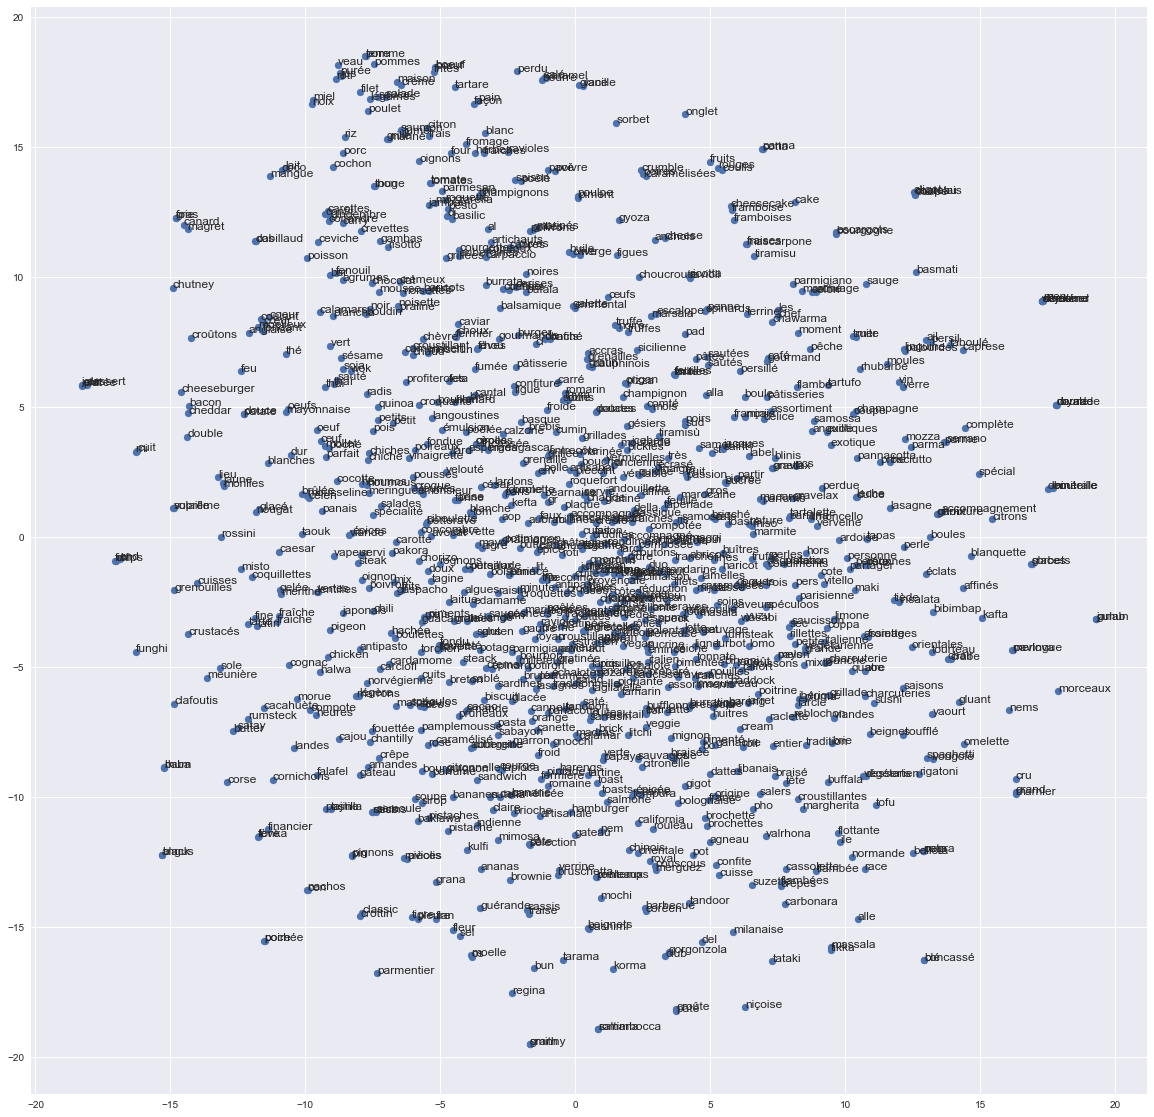

In [37]:
plt.rcParams["figure.figsize"] = (20,20)
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(vocabulary, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

    
plt.show()